In [1]:
# installare (se necessario) e importare GeoPandas

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.5 MB/s 
     |████████████████████████████████| 15.4 MB 21.0 MB/s 
     |████████████████████████████████| 6.3 MB 43.6 MB/s 


In [3]:
%matplotlib inline

import pandas as pd
import geopandas

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [11]:
piste_ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_ciclabili.zip')
piste_ciclabili

DriverError: ignored

In [ ]:
# visualizzaere il geodataset delel piste ciclabili

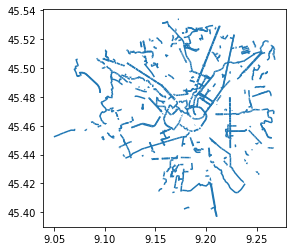

In [ ]:
piste_ciclabili.plot()

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [8]:
quartieri_milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip')
quartieri_milano

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

In [9]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 5.5 MB/s 


NameError: ignored

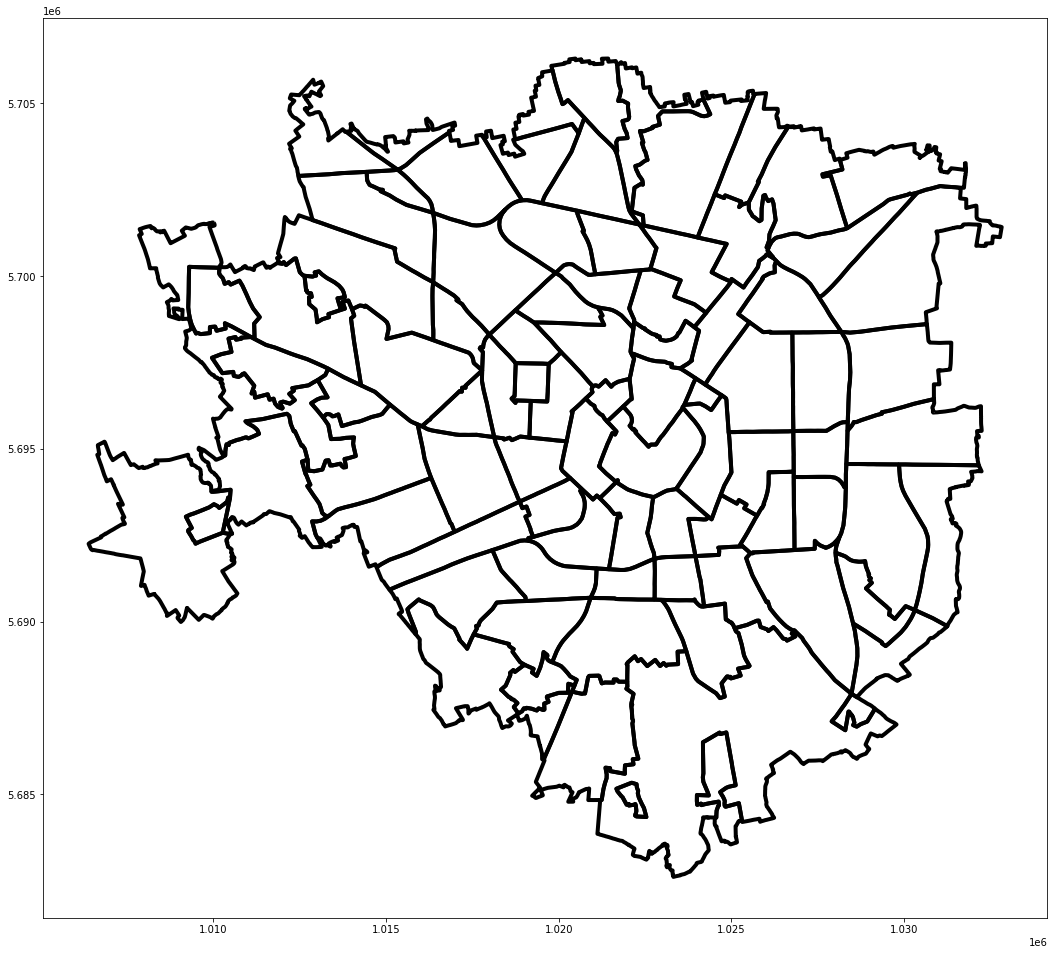

In [10]:
import contextily
ax = quartieri_milano.to_crs(epsg=3857).plot(figsize=(18, 18), linewidth=4, facecolor='none', edgecolor='k')
ax = piste_ciclabili.to_crs(epsg=3857).plot(ax=ax, linewidth=4)
contextily.add_basemap(ax)

In [ ]:
# trovare il quartiere meno esteso

In [12]:
min = quartieri_milano['Shape_Area'].min()
meno = quartieri_milano[quartieri_milano['Shape_Area'] == min]
meno

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
46,40,RONCHETTO DELLE RANE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,2223.117187,188863.446965,135,"POLYGON ((9.18364 45.40122, 9.18442 45.40004, ..."


In [ ]:
# trovare il quartiere più esteso

In [13]:
max = quartieri_milano['Shape_Area'].max()
piu = quartieri_milano[quartieri_milano['Shape_Area'] == max]
piu

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
55,85,PARCO DELLE ABBAZIE,05/02/2020,Vigente,Milano 2030 - PGT Approvato,33829.221463,1.373384e+07,144,"POLYGON ((9.21711 45.43187, 9.21733 45.43160, ..."


In [ ]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto

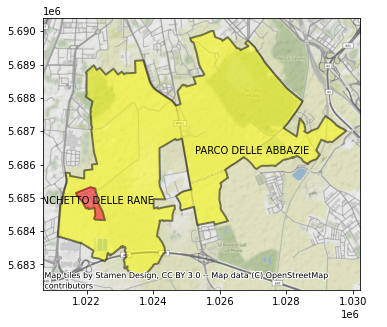

In [32]:
piu3857 = piu.to_crs(epsg=3857)
piu3857['coords'] = piu3857['geometry'].apply(lambda x: x.representative_point().coords[:])
piu3857['coords'] = [coords[0] for coords in piu3857['coords']]

ax= piu3857.plot(figsize=(10, 5), facecolor="yellow", edgecolor='k', alpha=0.5, linewidth=2)
for idx, row in piu3857.iterrows():
   ax.annotate(s=row['NIL'], xy=row['coords'], horizontalalignment='center', color='black', clip_on=True)

meno3857 = meno.to_crs(epsg=3857)
meno3857['coords'] = meno3857['geometry'].apply(lambda x: x.representative_point().coords[:])
meno3857['coords'] = [coords[0] for coords in meno3857['coords']]

for idx, row in meno3857.iterrows():
   ax.annotate(s=row['NIL'], xy=row['coords'], horizontalalignment='center', color='black', clip_on=True)

meno3857.plot(ax=ax, linewidth=5, facecolor="red", alpha=0.5)
contextily.add_basemap(ax)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [ ]:
affori_df = quartieri_milano.loc[quartieri_milano['NIL']=='AFFORI']
affori_df

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((9.17767 45.51899, 9.17796 45.51848, ..."


In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Affori

In [ ]:
affori = affori_df.geometry.squeeze()

In [ ]:
piste_ciclabili_affori = piste_ciclabili[piste_ciclabili.intersects(affori)]
piste_ciclabili_affori

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
32,9039,1088,VIALE ENRICO FERMI,None,urbana,percorso promiscuo - attraversamento,attraversamento,bidirezionale,attraversamento - generico,36.0,"LINESTRING (9.17915 45.51407, 9.17960 45.51413)"
252,9299,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,172.0,"LINESTRING (9.18299 45.50597, 9.18272 45.50617..."
255,9302,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,211.0,"LINESTRING (9.18176 45.50722, 9.18153 45.50742..."
294,9342,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,455.0,"LINESTRING (9.18045 45.50883, 9.18043 45.50890..."
668,9716,1088,VIALE ENRICO FERMI,None,ciclabile,corsia ciclabile - sede propria,margine,bidirezionale,corsia ciclabile,33.0,"LINESTRING (9.17925 45.51284, 9.17884 45.51277)"
...,...,...,...,...,...,...,...,...,...,...,...
2982,12754,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,8.0,"LINESTRING (9.17701 45.50897, 9.17706 45.50891)"
2983,12755,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,46.0,"LINESTRING (9.17675 45.50935, 9.17701 45.50897)"
2984,12756,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - attraversamento,attraversamento,bidirezionale,attraversamento - ciclabile,20.0,"LINESTRING (9.17664 45.50951, 9.17675 45.50935)"
2985,12757,1510,VIA PELLEGRINO ROSSI,None,ciclabile,corsia ciclabile - sede propria,carreggiata,bidirezionale,corsia ciclabile,40.0,"LINESTRING (9.17641 45.50983, 9.17664 45.50951)"


In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

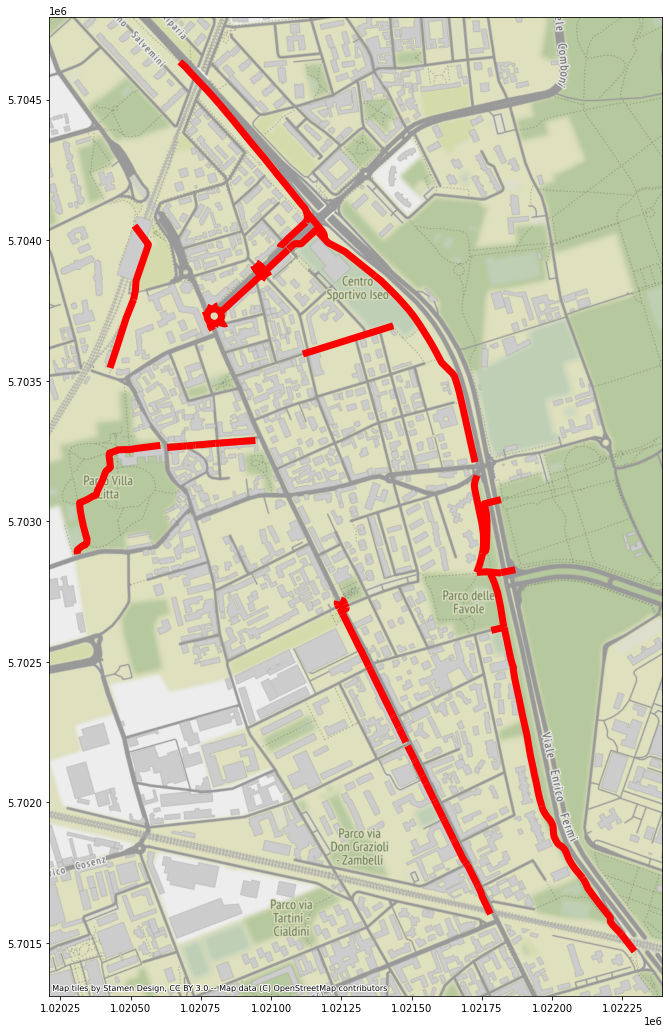

In [ ]:
ax = piste_ciclabili_affori.to_crs(epsg=3857).plot(figsize=(18, 18), linewidth=7, facecolor='none', edgecolor='red')
contextily.add_basemap(ax)